In [1]:
import pandas as pd
import numpy as np
import config
import sql_con
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bin import get_bins

In [2]:
# get config module variables
ROOT_DIR = config.ROOT_DIR
select_records = sql_con.select_records
insert_records = sql_con.insert_records
conn_odbc = sql_con.conn_odbc
read_contents = sql_con.read_contents

#### Read sales data and transform before plotting histogram

In [3]:
raw_sales = pd.read_excel(rf"{ROOT_DIR}/data/sales_2018.xlsx")

In [4]:
raw_sales.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2018-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2018-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2018-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2018-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2018-01-01 23:26:55


In [5]:
sales_agg = raw_sales.groupby(by=["account number", "name"], as_index=False)["ext price"].sum()

In [6]:
sales_agg.head()
sales_agg.shape

(20, 3)

#### Plot ext price's distribution on histogram (absolute frequency)

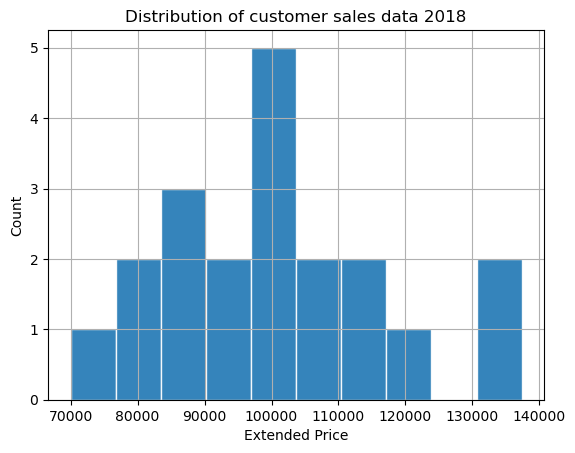

In [7]:
fig, ax = plt.subplots()

ax.hist(
    sales_agg["ext price"],
    alpha=0.9,
    bins=10,
    edgecolor="white"
)

ax.set_title("Distribution of customer sales data 2018")
ax.set_xlabel("Extended Price")
ax.set_ylabel("Count")
ax.grid(True)

#### Plot ext price's distribution on histogram (relative frequency)

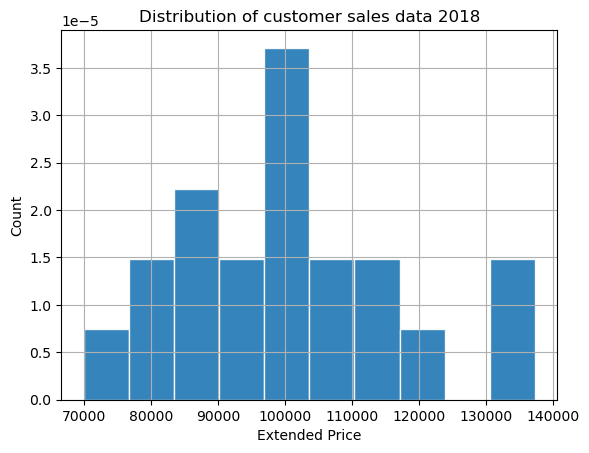

In [8]:
# (height of bin) * (width of bin) = (number of datapoints falling in bin) / (total number of datapoints)
fig, ax = plt.subplots()

ax.hist(
    sales_agg["ext price"],
    alpha=0.9,
    bins=10,
    edgecolor="white",
    density=True
)

ax.set_title("Distribution of customer sales data 2018")
ax.set_xlabel("Extended Price")
ax.set_ylabel("Count")
ax.grid(True)

In [9]:
# precise upper and lower bounds for given number of bins
get_bins(sales_agg, "ext price", 10)

,bin_num,lower_bound,upper_bound
0,1,70004.36,76739.12
1,2,76739.12,83473.88
2,3,83473.88,90208.64
3,4,90208.64,96943.40
4,5,96943.40,103678.16
5,6,103678.16,110412.92
6,7,110412.92,117147.68
7,8,117147.68,123882.44
8,9,123882.44,130617.20
9,10,130617.20,137351.96


In [13]:
# get value counts distributed in bins
np.histogram(sales_agg["ext price"], bins=10)

(array([1, 2, 3, 2, 5, 2, 2, 1, 0, 2], dtype=int64),
 array([ 70004.36,  76739.12,  83473.88,  90208.64,  96943.4 , 103678.16,
        110412.92, 117147.68, 123882.44, 130617.2 , 137351.96]))

In [11]:
# get summary statistics for extended price
sales_agg["ext price"].describe()

count        20.000000
mean     100939.216000
std       17675.097485
min       70004.360000
25%       89137.707500
50%      100271.535000
75%      110132.552500
max      137351.960000
Name: ext price, dtype: float64

In [36]:
sales_agg["quartile"] = pd.qcut(sales_agg["ext price"], q=4, precision=3)
sales_agg["decile"] = pd.qcut(sales_agg["ext price"], q=10, precision=3)
sales_agg["quartile_grp"] = pd.qcut(sales_agg["ext price"], q=4, precision=3, labels=range(1, 5))
sales_agg["decile_grp"] = pd.qcut(sales_agg["ext price"], q=10, precision=3, labels=range(1, 11))

In [38]:
sales_agg.sort_values(by="ext price")

,account number,name,ext price,quartile,decile,quartile_grp,decile_grp
11,604255,"Halvorson, Crona and Champlin",70004.36,"(70004.359, 89137.708]","(70004.359, 82368.321]",1,1
2,163416,Purdy-Kunde,77898.21,"(70004.359, 89137.708]","(70004.359, 82368.321]",1,1
0,141962,Herman LLC,82865.00,"(70004.359, 89137.708]","(82368.321, 87167.958]",1,2
6,307599,"Kassulke, Ondricka and Metz",86451.07,"(70004.359, 89137.708]","(82368.321, 87167.958]",1,2
12,642753,Pollich LLC,87347.18,"(70004.359, 89137.708]","(87167.958, 90686.361]",1,3
5,257198,"Cronin, Oberbrunner and Spencer",89734.55,"(89137.708, 100271.535]","(87167.958, 90686.361]",2,3
13,672390,Kuhn-Gusikowski,91094.28,"(89137.708, 100271.535]","(90686.361, 95908.156]",2,4
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.361, 95908.156]",2,4
10,527099,Sanford and Sons,98822.98,"(89137.708, 100271.535]","(95908.156, 100271.535]",2,5
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.156, 100271.535]",2,5


#### Visualize ext price distribution in box plot

Text(0.5, 1.0, 'Box plot for extended price distribution')

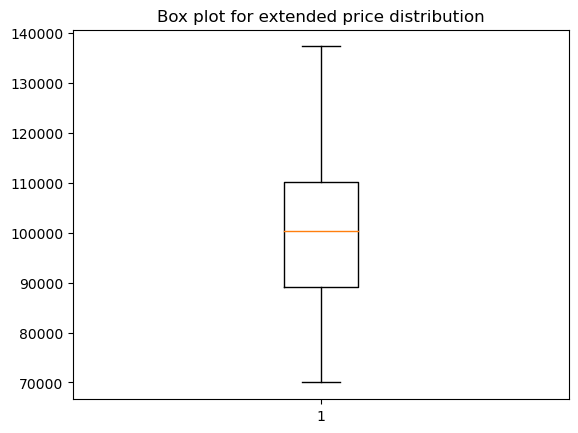

In [42]:
fig, ax = plt.subplots()

ax.boxplot(
    x=sales_agg["ext price"]
)

ax.set_title("Box plot for extended price distribution")